## Cross-Sell Prediction

https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/

### Importing Necessary Libraries

In [86]:
import pandas as pd
from pandas_profiling import profile_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,r2_score, mean_absolute_error, mean_squared_error,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel
from scipy import stats
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

def conductTest(a,b):
    freq_table = pd.crosstab(index=a,columns=b)
    chi2,p,dof,_ = stats.chi2_contingency(freq_table.iloc[0].values, freq_table.iloc[1].values)
    if (p<0.05):
        print("p-value is "+str(p)+". "+str(freq_table.index.name)+" and " +str(freq_table.columns.name)+" are dependent")
    else:
        print("p-value is "+str(p)+". "+str(freq_table.index.name)+" and " +str(freq_table.columns.name)+" are independent")

def errormetrics(a,b):
    print("Accuracy--->",accuracy_score(a,b))
    print(classification_report(a,b))
    print("ROC Score-->",roc_auc_score(a,b))
    print(confusion_matrix(a,b))
    print("F1 Score--->",f1_score(a,b))

def ML_Model(model,train_x,test_x,train_y,test_y):
    model.fit(train_x,train_y)
    y_pred = model.predict(test_x)
    errormetrics(test_y,y_pred)

In [84]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


You should consider upgrading via the 'c:\users\aravi\anaconda3\python.exe -m pip install --upgrade pip' command.


### Loading data

In [2]:
data = pd.read_csv(r"D:\Data_Science\Analytics Vidhya\Cross_Sell_Prediction\train.csv")

### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
for column in data.columns:
    print(column, data[column].nunique())

id 381109
Gender 2
Age 66
Driving_License 2
Region_Code 53
Previously_Insured 2
Vehicle_Age 3
Vehicle_Damage 2
Annual_Premium 48838
Policy_Sales_Channel 155
Vintage 290
Response 2


In [27]:
data1 = data.copy()
data1 = data1.drop('id',axis=1)

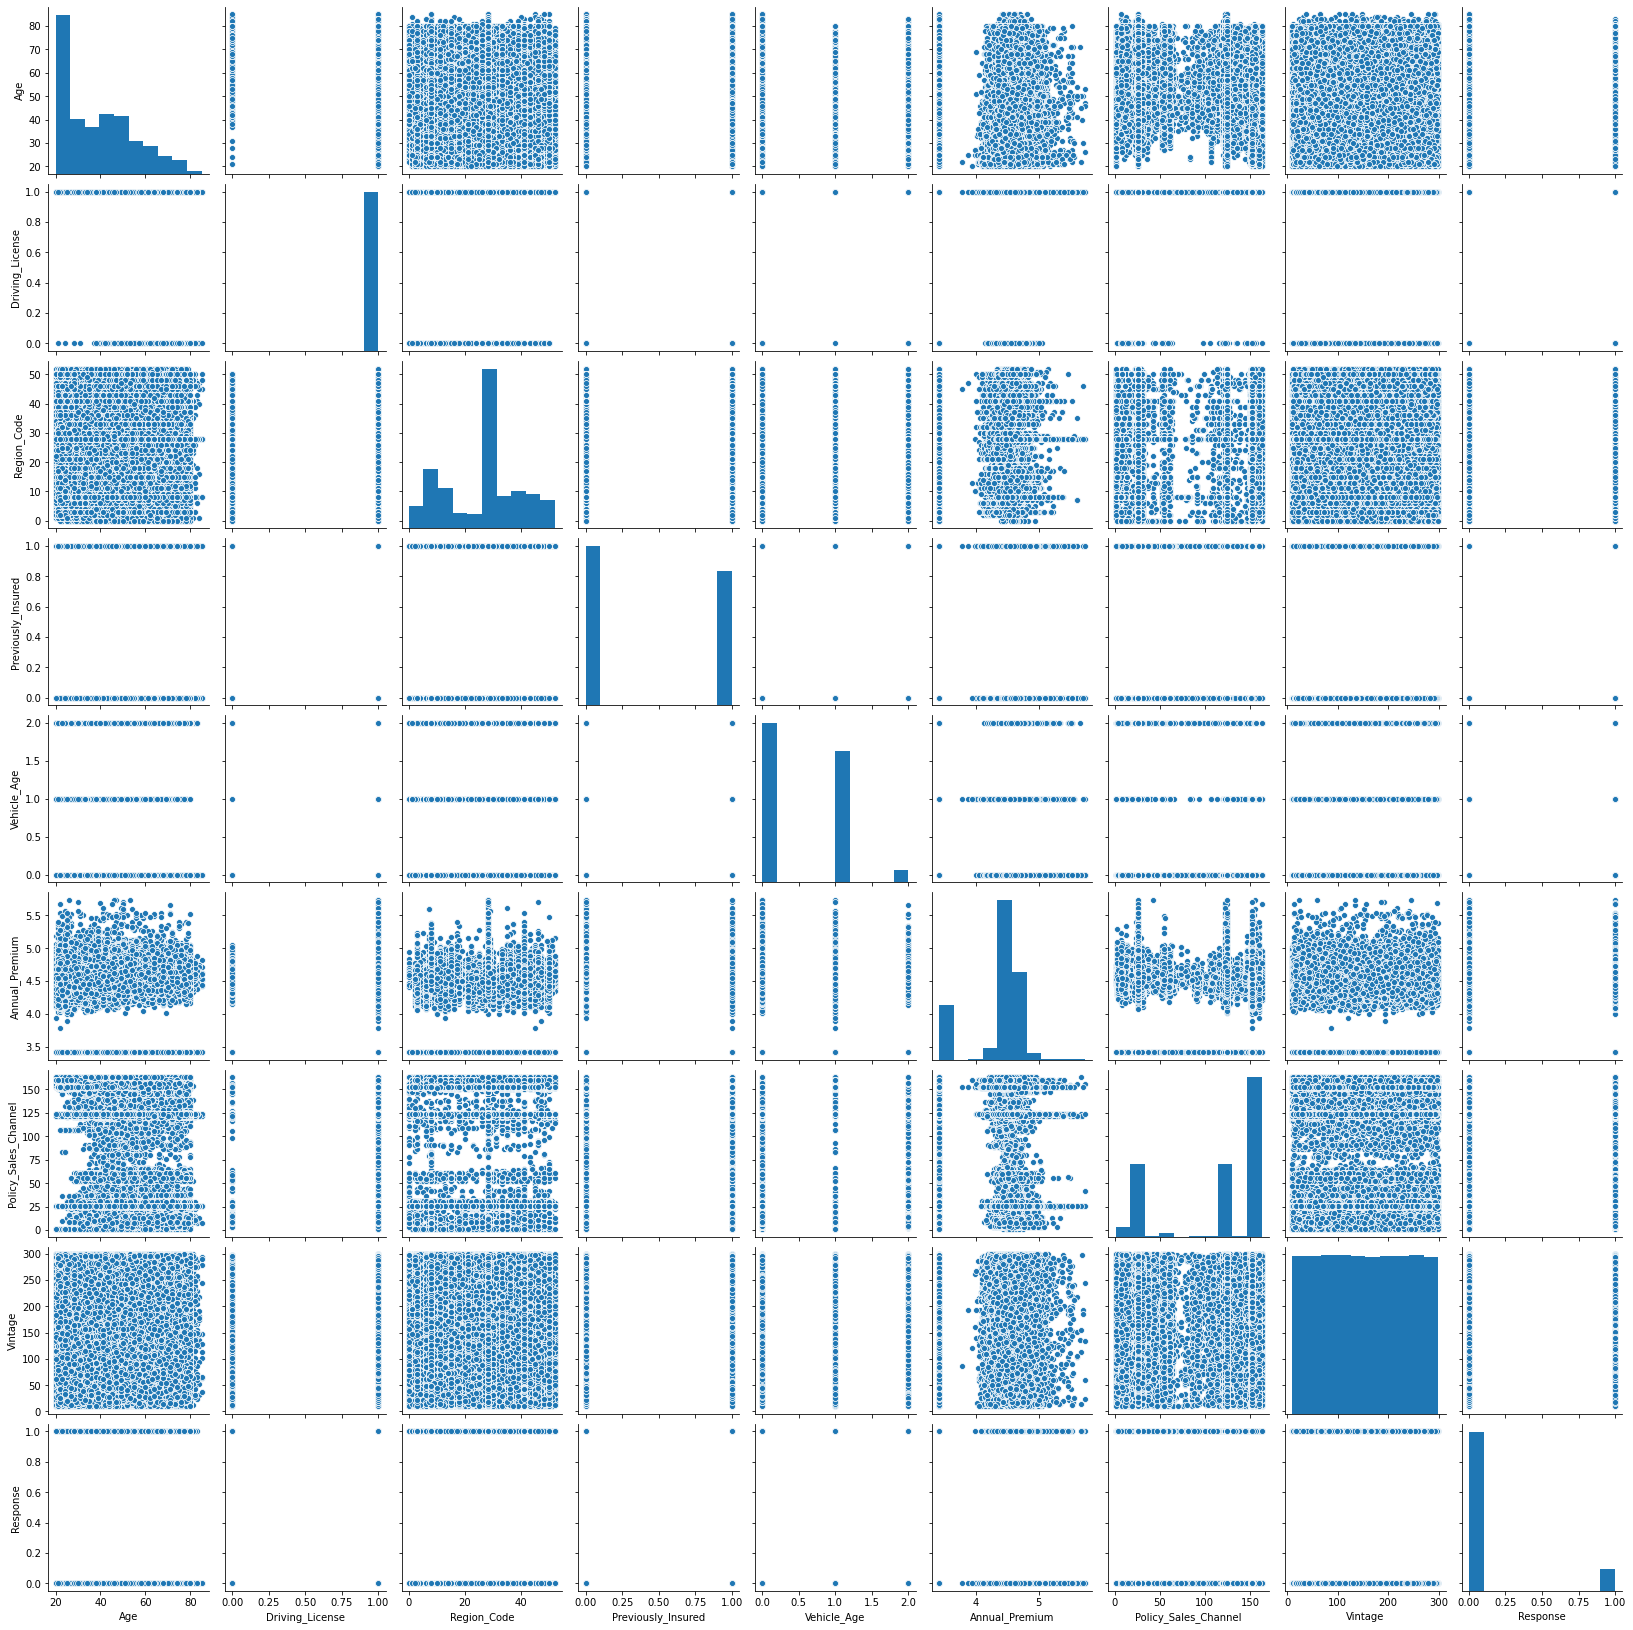

In [43]:
sns.pairplot(data=data1)

In [6]:
for column in data1.columns:
    print(column)
    print(data1[column].value_counts())
    print("\n\n")

Gender
Male      206089
Female    175020
Name: Gender, dtype: int64



Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64



Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64



Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.

In [31]:
data1.groupby(['Response','Vehicle_Damage'])['Annual_Premium'].value_counts()

Response  Vehicle_Damage  Annual_Premium
0         No              2630.0            26588
                          69856.0              47
                          33877.0              26
                          28905.0              23
                          28629.0              21
                                            ...  
1         Yes             309867.0              1
                          316563.0              1
                          340439.0              1
                          489663.0              1
                          540165.0              1
Name: Annual_Premium, Length: 101549, dtype: int64

In [28]:
data1.Annual_Premium = np.log10(data1['Annual_Premium']+1)

In [24]:
def replace_str(a):
        str(a).replace('<','')
        str(a).replace('>','')        

In [31]:
le = LabelEncoder()
data1.Vehicle_Age = le.fit_transform(data1.Vehicle_Age)

In [32]:
data1.Vehicle_Age

0         2
1         0
2         2
3         1
4         1
         ..
381104    0
381105    1
381106    1
381107    2
381108    0
Name: Vehicle_Age, Length: 381109, dtype: int32

In [33]:
data2 = pd.get_dummies(data1,drop_first=True)

In [34]:
data2.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,44,1,28.0,0,2,4.606972,26.0,217,1,1,1
1,76,1,3.0,0,0,4.525524,26.0,183,0,1,0
2,47,1,28.0,0,2,4.583142,26.0,27,1,1,1
3,21,1,11.0,1,1,4.456670,152.0,203,0,1,0
4,29,1,41.0,1,1,4.439285,152.0,39,0,0,0


In [35]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()

In [36]:
model_dict = {"Logistic Regression":lr, "Decision Tree":dt, "Random Forest":rf, "XgBoost":xgb, "LGBM":lgb}

### Baseline Model

In [37]:
x = data2.drop('Response',axis=1)
y = data2.Response

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
for i,j in model_dict.items():
    print("\033[1m"+i+"\033[0m")
    ML_Model(j, x_train, x_test, y_train, y_test)
    print("\n\n")

Logistic Regression


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy---> 0.8747343286715121
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.04      0.00      0.00      9523

    accuracy                           0.87     76222
   macro avg       0.46      0.50      0.47     76222
weighted avg       0.77      0.87      0.82     76222

ROC Score--> 0.49985759899203264
[[66673    26]
 [ 9522     1]]
F1 Score---> 0.0002094240837696335



Decision Tree
Accuracy---> 0.8209834431004172
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66699
           1       0.29      0.31      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222

ROC Score--> 0.6011987559445409
[[59642  7057]
 [ 6588  2935]]
F1 Score---> 0.3007942608250064



Random Forest
Accuracy---> 0.8645666605441998
              precisio

### Feature Engineering

In [60]:
data3 = data1.copy()

In [52]:
print(data3.groupby('Age')['Previously_Insured'].value_counts())

Age  Previously_Insured
20   0                      3734
     1                      2498
21   1                      8700
     0                      7757
22   1                     13111
                           ...  
83   0                         8
84   1                         9
     0                         2
85   0                         7
     1                         4
Name: Previously_Insured, Length: 132, dtype: int64


In [58]:
data3.Region_Code.value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [121]:
x = data3
y = data3.Response
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Target Encoding

In [77]:
Age_enc = x_train.groupby('Age')['Response'].mean()
x_train['Age_enc'] = x_train.Age.map(Age_enc)
x_test['Age_enc'] = x_test.Age.map(Age_enc)

<ipython-input-77-9a8cc1246f45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Age_enc'] = x_train.Age.map(Age_enc)
<ipython-input-77-9a8cc1246f45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Age_enc'] = x_test.Age.map(Age_enc)


In [78]:
reg_enc = x_train.groupby('Region_Code')['Response'].mean()
x_train['Region_Code_enc'] = x_train.Region_Code.map(reg_enc)
x_test['Region_Code_enc'] = x_test.Region_Code.map(reg_enc)

<ipython-input-78-9715fedda507>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Region_Code_enc'] = x_train.Region_Code.map(reg_enc)
<ipython-input-78-9715fedda507>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Region_Code_enc'] = x_test.Region_Code.map(reg_enc)


In [79]:
x_train = x_train.drop('Response',axis=1)
x_test = x_test.drop('Response',axis=1)

In [82]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [83]:
for i,j in model_dict.items():
    print("\033[1m"+i+"\033[0m")
    ML_Model(j, x_train, x_test, y_train, y_test)
    print("\n\n")

Logistic Regression


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy---> 0.8750623179659416
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

ROC Score--> 0.5
[[66699     0]
 [ 9523     0]]
F1 Score---> 0.0



Decision Tree
Accuracy---> 0.8209965626721943
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66699
           1       0.30      0.31      0.31      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.82     76222

ROC Score--> 0.6039067382257649
[[59583  7116]
 [ 6528  2995]]
F1 Score---> 0.3050830192523174



Random Forest
Accuracy---> 0.8621920180525308
              precision    recall  f1-score   support

 

### Oversampling

In [87]:
oversample = SMOTE()

In [88]:
x_resample,y_resample = oversample.fit_resample(x_train,y_train)

In [89]:
for i,j in model_dict.items():
    print("\033[1m"+i+"\033[0m")
    ML_Model(j, x_resample, x_test, y_resample, y_test)
    print("\n\n")

Logistic Regression


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy---> 0.693841673007793
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     66699
           1       0.27      0.87      0.41      9523

    accuracy                           0.69     76222
   macro avg       0.62      0.77      0.60     76222
weighted avg       0.88      0.69      0.75     76222

ROC Score--> 0.7678595502099261
[[44634 22065]
 [ 1271  8252]]
F1 Score---> 0.41425702811244974



Decision Tree
Accuracy---> 0.8180708981658839
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66699
           1       0.30      0.33      0.31      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.61      0.61     76222
weighted avg       0.83      0.82      0.82     76222

ROC Score--> 0.6108766039293163
[[59168  7531]
 [ 6336  3187]]
F1 Score---> 0.3149053900498987



Random Forest
Accuracy---> 0.84769489123875
              precision    r

In [93]:
params_dt = {'min_samples_split':range(2,6,1),'min_samples_leaf':range(1,6,1),'max_depth':range(1,21,1)}
gs_dt = GridSearchCV(dt,params_dt,verbose=2, n_jobs=-1)
gs_dt.fit(x_resample,y_resample)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 17.7min finished


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6)},
             verbose=2)

In [94]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=3)

In [95]:
dt1 = DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=3)
dt1.fit(x_resample,y_resample)
errormetrics(y_test,dt1.predict(x_test))

Accuracy---> 0.8078769908950172
              precision    recall  f1-score   support

           0       0.92      0.85      0.89     66699
           1       0.32      0.49      0.39      9523

    accuracy                           0.81     76222
   macro avg       0.62      0.67      0.64     76222
weighted avg       0.85      0.81      0.82     76222

ROC Score--> 0.6713038500594775
[[56919  9780]
 [ 4864  4659]]
F1 Score---> 0.3888657040313831


In [98]:
params_rf = {'n_estimators':[100,500,1000],'min_samples_leaf':range(1,6,1),'max_depth':range(11,21,1)}
gs_rf = GridSearchCV(rf,params_rf,verbose=2, n_jobs=-1)
gs_rf.fit(x_resample,y_resample)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 29.6min


KeyboardInterrupt: 

In [ ]:
gs_rf.best_estimator_

In [ ]:
rf1 = 
rf1.fit(x_resample,y_resample)
errormetrics(y_test,rf1.predict(x_test))

### Test Data

In [117]:
test = pd.read_csv(r"D:\Data_Science\Analytics Vidhya\Cross_Sell_Prediction\test.csv")

In [119]:
test.Vehicle_Age = le.transform(test.Vehicle_Age)

#### Repeating preprocessing steps for Test Data

In [122]:
Age_enc = x.groupby('Age')['Response'].mean()
x['Age_enc'] = x.Age.map(Age_enc)
test['Age_enc'] = test.Age.map(Age_enc)
reg_enc = x.groupby('Region_Code')['Response'].mean()
x['Region_Code_enc'] = x.Region_Code.map(reg_enc)
test['Region_Code_enc'] = test.Region_Code.map(reg_enc)

In [123]:
vintage_enc = x.groupby('Vintage')['Response'].mean()
x['vintage_enc'] = x.Vintage.map(vintage_enc)
test['vintage_enc'] = test.Vintage.map(vintage_enc)

In [135]:
test.Annual_Premium = np.log10(test['Annual_Premium']+1)

In [127]:
test = pd.get_dummies(test)

In [126]:
x = x.drop(['Age','Region_Code'],axis=1)
test = test.drop(['Age','Region_Code','id'],axis=1)

In [128]:
x = x.drop('Response',axis=1)

In [129]:
x = pd.get_dummies(x)

In [109]:
x.head()

,Driving_License,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Age_enc,Region_Code_enc,vintage_enc,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,0,2,4.606972,26.0,217,0.216705,0.187163,0.114504,0,1,0,1
1,1,0,0,4.525524,26.0,183,0.077364,0.127662,0.133908,0,1,1,0
2,1,0,2,4.583142,26.0,27,0.218610,0.187163,0.114327,0,1,0,1
3,1,1,1,4.456670,152.0,203,0.034879,0.112760,0.121894,0,1,1,0
4,1,1,1,4.439285,152.0,39,0.101629,0.121776,0.128862,1,0,1,0


In [132]:
x_resample, y_resample = oversample.fit_resample(x,y)

### Submission

In [111]:
sub = pd.read_csv(r"D:\Data_Science\Analytics Vidhya\Cross_Sell_Prediction\sample_submission.csv")

In [130]:
x.columns

Index(['Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Age_enc',
       'Region_Code_enc', 'vintage_enc', 'Gender_Female', 'Gender_Male',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype='object')

In [131]:
test.columns

Index(['Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Age_enc',
       'Region_Code_enc', 'vintage_enc', 'Gender_Female', 'Gender_Male',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype='object')

In [136]:
lr = LogisticRegression()
lr.fit(x_resample,y_resample)
y_pred = lr.predict(test)
sub.Response = y_pred
sub.to_csv(r"D:\Data_Science\Analytics Vidhya\Cross_Sell_Prediction\LR_13_Dec_20.csv",index=False)

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
